In [33]:
!pip install jax dm-haiku sktime matplotlib jaxlib jax_dataloader optax seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.3 MB/s eta 0:00:00a 0:00:01


In [1]:
import matplotlib.pyplot as plt

import jax
from jax import numpy as jnp, random, jit, vmap, grad, nn
from functools import partial

import jax_dataloader as jdl
import optax

import haiku as hk

import pandas as pd
import numpy as np
import sklearn as skl
from sklearn import metrics, model_selection

rng = hk.PRNGSequence(0)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
dataset_names = [
    "AbnormalHeartbeat",
    "ACSF1",
    "Adiac",
    "AllGestureWiimoteX",
    "AllGestureWiimoteY",
    "AllGestureWiimoteZ",
    "ArrowHead",
    "ArticularyWordRecognition",
    "AsphaltObstacles",
    "AsphaltObstaclesCoordinates",
    "AsphaltPavementType",
    "AsphaltPavementTypeCoordinates",
    "AsphaltRegularity",
    "AsphaltRegularityCoordinates",
    "AtrialFibrillation",
    "BasicMotions",
    "Beef",
    "BeetleFly",
    "BinaryHeartbeat",
    "BirdChicken",
    "Blink",
    "BME",
    "Car",
    "CatsDogs",
    "CBF",
    "CharacterTrajectories",
    "Chinatown",
    "ChlorineConcentration",
    "CinCECGTorso",
    "Coffee",
    "Colposcopy",
    "Computers",
    "CounterMovementJump",
    "Cricket",
    "CricketX",
    "CricketY",
    "CricketZ",
    "Crop",
    "DiatomSizeReduction",
    "DistalPhalanxOutlineAgeGroup",
    "DistalPhalanxOutlineCorrect",
    "DistalPhalanxTW",
    "DodgerLoopDay",
    "DodgerLoopGame",
    "DodgerLoopWeekend",
    "DuckDuckGeese",
    "DucksAndGeese",
    "Earthquakes",
    "ECG200",
    "ECG5000",
    "ECGFiveDays",
    "EigenWorms",
    "ElectricDeviceDetection",
    "ElectricDevices",
    "EMOPain",
    "EOGHorizontalSignal",
    "EOGVerticalSignal",
    "Epilepsy",
    "ERing",
    "EthanolConcentration",
    "EthanolLevel",
    "EyesOpenShut",
    "FaceAll",
    "FaceDetection",
    "FaceFour",
    "FacesUCR",
    "FiftyWords",
    "FingerMovements",
    "Fish",
    "FordA",
    "FordB",
    "FreezerRegularTrain",
    "FreezerSmallTrain",
    "FruitFlies",
    "Fungi",
    "GestureMidAirD1",
    "GestureMidAirD2",
    "GestureMidAirD3",
    "GesturePebbleZ1",
    "GesturePebbleZ2",
    "GunPoint",
    "GunPointAgeSpan",
    "GunPointMaleVersusFemale",
    "GunPointOldVersusYoung",
    "Ham",
    "HandMovementDirection",
    "HandOutlines",
    "Handwriting",
    "Haptics",
    "Heartbeat",
    "Herring",
    "HouseTwenty",
    "InlineSkate",
    "InsectEPGRegularTrain",
    "InsectEPGSmallTrain",
    "InsectSound",
    "InsectWingbeat",
    "ItalyPowerDemand",
    "JapaneseVowels",
    "KeplerLightCurves",
    "LargeKitchenAppliances",
    "Libras",
    "Lightning2",
    "Lightning7",
    "LSST",
    "Mallat",
    "Meat",
    "MedicalImages",
    "MelbournePedestrian",
    "MiddlePhalanxOutlineAgeGroup",
    "MiddlePhalanxOutlineCorrect",
    "MiddlePhalanxTW",
    "MindReading",
    "MixedShapes",
    "MixedShapesSmallTrain",
    "MosquitoSound",
    "MoteStrain",
    "MotionSenseHAR",
    "MotorImagery",
    "NATOPS",
    "NonInvasiveFetalECGThorax1",
    "NonInvasiveFetalECGThorax2",
    "OliveOil",
    "OSULeaf",
    "PEMS-SF",
    "PenDigits",
    "PhalangesOutlinesCorrect",
    "Phoneme",
    "PhonemeSpectra",
    "PickupGestureWiimoteZ",
    "PigAirwayPressure",
    "PigArtPressure",
    "PigCVP",
    "PLAID",
    "Plane",
    "PowerCons",
    "ProximalPhalanxOutlineAgeGroup",
    "ProximalPhalanxOutlineCorrect",
    "ProximalPhalanxTW",
    "RacketSports",
    "RefrigerationDevices",
    "RightWhaleCalls",
    "Rock",
    "ScreenType",
    "SelfRegulationSCP1",
    "SelfRegulationSCP2",
    "SemgHandGenderCh2",
    "SemgHandMovementCh2",
    "SemgHandSubjectCh2",
    "ShakeGestureWiimoteZ",
    "ShapeletSim",
    "ShapesAll",
    "SharePriceIncrease",
    "SmallKitchenAppliances",
    "SmoothSubspace",
    "SonyAIBORobotSurface1",
    "SonyAIBORobotSurface2",
    "SpokenArabicDigits",
    "StandWalkJump",
    "StarLightCurves",
    "Strawberry",
    "SwedishLeaf",
    "Symbols",
    "SyntheticControl",
    "Tiselac",
    "ToeSegmentation1",
    "ToeSegmentation2",
    "Trace",
    "TwoLeadECG",
    "TwoPatterns",
    "UMD",
    "UrbanSound",
    "UWaveGestureLibrary",
    "UWaveGestureLibraryAll",
    "UWaveGestureLibraryX",
    "UWaveGestureLibraryY",
    "UWaveGestureLibraryZ",
    "Wafer",
    "Wine",
    "WordSynonyms",
    "Worms",
    "WormsTwoClass",
    "Yoga"
]
f'len(dataset_names) = {len(dataset_names)}'

'len(dataset_names) = 183'

In [34]:
from sktime.datasets import load_from_tsfile
from sktime.utils.plotting import plot_series

In [62]:
def list_ts():
    import os
    return os.listdir('./Univariate_ts/')

def load_ts(name, split='train'):
    df,y = load_from_tsfile(f'./Univariate_ts/{name}/{name}_{split.upper()}.ts')
    X = [
        pd.concat(iter(df[col]), axis=1).to_numpy(dtype=np.float32)
        for col in df
    ]
    X = np.transpose(np.stack(X), axes=[2,1,0])
    y = y.astype(float).astype(int)
    return X,y

def load_train_test(name):
    X_train, y_train = load_ts(name, split='train')
    X_test, y_test = load_ts(name, split='test')
    return X_train, X_test, y_train, y_test

In [65]:
X_train, X_test, y_train, y_test = load_train_test('ArrowHead')

In [66]:
from sklearn import metrics, model_selection, ensemble

In [80]:
np.prod(X_train.shape)

9036

In [105]:
def eval_clf(clf):
    def make2d(x):
        n, *_ = x.shape
        return x.reshape(n, -1)
    clf.fit(make2d(X_train), y_train)
    print(metrics.classification_report(y_train, clf.predict(make2d(X_train))))
    print(metrics.classification_report(y_test, clf.predict(make2d(X_test))))
    return clf

In [108]:
%time eval_clf(ensemble.RandomForestClassifier(n_estimators=100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

              precision    recall  f1-score   support

           0       0.90      0.62      0.74        69
           1       0.71      0.68      0.69        53
           2       0.53      0.75      0.62        53

    accuracy                           0.68       175
   macro avg       0.71      0.69      0.68       175
weighted avg       0.73      0.68      0.69       175

CPU times: user 340 ms, sys: 9.43 ms, total: 349 ms
Wall time: 347 ms


RandomForestClassifier()

In [110]:
from sktime.classification import kernel_based
%time eval_clf(kernel_based.RocketClassifier(num_kernels=2000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

              precision    recall  f1-score   support

           0       0.91      0.58      0.71        69
           1       0.82      0.92      0.87        53
           2       0.72      0.96      0.82        53

    accuracy                           0.80       175
   macro avg       0.81      0.82      0.80       175
weighted avg       0.82      0.80      0.79       175

CPU times: user 6.61 s, sys: 992 ms, total: 7.6 s
Wall time: 6.33 s


RocketClassifier(num_kernels=2000)

In [111]:
from sktime.classification import hybrid
%time eval_clf(hybrid.HIVECOTEV2(time_limit_in_minutes=.2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        69
           1       0.77      0.91      0.83        53
           2       0.96      0.94      0.95        53

    accuracy                           0.87       175
   macro avg       0.88      0.88      0.88       175
weighted avg       0.88      0.87      0.87       175

CPU times: user 58.7 s, sys: 6.38 s, total: 1min 5s
Wall time: 56.1 s


HIVECOTEV2(time_limit_in_minutes=0.2)

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sktime.pipeline import make_pipeline
from sktime.transformations.panel.catch22 import Catch22
clf = make_pipeline(
    Catch22(),
    RandomForestClassifier(n_estimators=100)
)
%time eval_clf(clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

              precision    recall  f1-score   support

           0       0.84      0.68      0.75        69
           1       0.69      0.62      0.65        53
           2       0.59      0.79      0.68        53

    accuracy                           0.70       175
   macro avg       0.71      0.70      0.69       175
weighted avg       0.72      0.70      0.70       175

CPU times: user 4.74 s, sys: 15.1 ms, total: 4.75 s
Wall time: 4.75 s


SklearnClassifierPipeline(classifier=RandomForestClassifier(),
                          transformers=[Catch22()])

In [116]:
from sktime.classification.kernel_based import RocketClassifier
from sktime.transformations.series.exponent import ExponentTransformer
pipe = ExponentTransformer(power=2) \
    * RocketClassifier(num_kernels=2000)
%time eval_clf(pipe)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

              precision    recall  f1-score   support

           0       0.94      0.65      0.77        69
           1       0.79      0.92      0.85        53
           2       0.77      0.94      0.85        53

    accuracy                           0.82       175
   macro avg       0.83      0.84      0.82       175
weighted avg       0.84      0.82      0.82       175

CPU times: user 8.1 s, sys: 907 ms, total: 9.01 s
Wall time: 7.66 s


ClassifierPipeline(classifier=RocketClassifier(num_kernels=2000),
                   transformers=[ExponentTransformer(power=2)])

In [131]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

def score(clf,X,y):
    return f1_score(y, clf.predict(X), average='weighted')
clf = RocketClassifier(num_kernels=1000)
cross_val_score(clf, X_train, y=y_train, cv=StratifiedKFold(3), scoring=score)

array([0.16666667, 0.16666667, 0.16666667])

In [146]:
cv = StratifiedKFold(3)
Counter(y_train[next(cv.split(X_train, y_train))[0]])

Counter({0: 8, 1: 8, 2: 8})

In [142]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({0: 12, 1: 12, 2: 12}), Counter({0: 69, 1: 53, 2: 53}))

In [101]:
class Own(BaseForecaster):
    _tags = {
        'requires-fh-in-fit': False,
    }
    def __init__(self):
        # super(Own, self).__init__()
        super().__init__()
    
    def _fit(self, y, X, fh):
        self.last = y[-1]
        
    def _predict(self, fh, X):
        index = fh.to_absolute(self.cutoff)
        return pd.Series(np.repeat(self.last, len(fh)), index)
    
    


In [102]:
y = datasets.load_airline()
fh = np.arange(1,10)
model = Own()# NaiveForecaster(strategy='last')
model.fit(y)
y_pred = model.predict(fh)
y_pred

1961-01    432.0
1961-02    432.0
1961-03    432.0
1961-04    432.0
1961-05    432.0
1961-06    432.0
1961-07    432.0
1961-08    432.0
1961-09    432.0
Freq: M, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

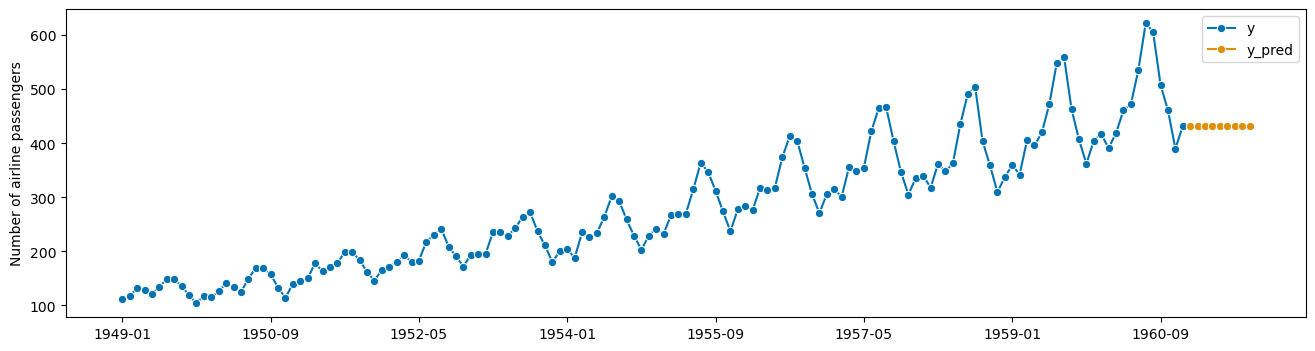

In [103]:
plot_series(y,y_pred, labels=['y','y_pred'])